In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
data = load_digits()

print(data['DESCR'])

fue = data.data
target = data.target
print('shape of Property' , fue.shape)
print('shape of target' , target.shape)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

حال میخواهیم داده های تست و آموزش را جدا کنیم. بیست در صد از داده ها برای تست کنار میگذاریم و مدل خود را با 80درصد باقی مانده آموزش میدهیم.

kernel='linear'
یعنی از یک تابع با کرنل خطی برای دسته بندی استفاده میکنیم
c
قدرت نسبی منظم سازی را تعیین میکند.

multi-class
برای اینکه چند کلاس را با هم هندل کنیم 


پارامتر 
C
 به بهینه سازی 
 SVM
  می گوید که چقدر می خواهید از طبقه بندی نادرست هر مثال آموزشی جلوگیری کنید. برای مقادیر بزرگ 
  C
  
  ، بهینه‌سازی یک 
  hyperplane  
  
 
  با حاشیه کوچک‌تر را انتخاب می‌کند، در صورتی که این 
  hyperplane 
   کار بهتری در طبقه‌بندی صحیح تمام نقاط آموزشی انجام دهد.
   درواقع فاصله خط از نزدیکترین عضو دسته ها را مشخص میکند

اگر 
 بیش از دو کلاس داشته باشیم، استراتژی چند کلاسه را تعیین میکند

«crammer_singer»
 یک هدف مشترک را روی همه کلاس‌ها بهینه می‌کند. در حالی که  از منظر نظری جالب است، به ندرت در عمل استفاده می شود زیرا به ندرت منجر به دقت بهتر می شود و محاسبه آن گران تر است. اگر "crammer_singer"
  انتخاب شود، گزینه های از دست دادن، پنالتی و دوگانه نادیده گرفته می شوند.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(fue, target , test_size     = 0.2)
from sklearn.svm import SVC
#from sklearn.svm import Linearsvc
from sklearn.svm import LinearSVC
model=LinearSVC(multi_class='crammer_singer', C=1e10)

model.fit(X_train, Y_train)

modelnew = LinearSVC(multi_class='crammer_singer', C=1e10)
modelnew.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=10000000000.0, multi_class='crammer_singer')

حال با کمک کتد
score
میزان دقت مدل را میسنجیم
در مدل اول دقت تست 96 درصد و دقت آموزش 100 درصد شده است.

In [ ]:
score_test = model.score(X_test, Y_test)
score_train = model.score(X_train, Y_train)
y_predtest = model.predict(X_test)
print(score_test)
print(score_train)

0.9611111111111111
1.0


In [ ]:
score_test1 = modelnew.score(X_test, Y_test)
score_train1 = modelnew.score(X_train, Y_train)
y_predtest1 = modelnew.predict(X_test)
print(score_test1)
print(score_train1)

0.9611111111111111
1.0


In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix'):
    plt.figure(figsize=(9,9))
    plt.imshow(cm , cmap='gray')
    plt.title(title, size = 15)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
    plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
    plt.tight_layout()
    plt.ylabel(' label')
    plt.xlabel('Predicted label')
    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center')


با کمک ماتریس 
confusion
دقت طبقه بندی را ارزیابی میکنیم.

در تعریف یک ماتریس 
confusion
به گونه ای است که مثلا خانه 
Cij
در ان یعنی تعداد مشاهداتی که باید در گروه 
i
 باشند اما در گروه 
 j
 طبقه بندی شده اند.

Confusion matrix
[[38  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  1  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  1  0]
 [ 1  0  0  0 27  0  0  1  0  0]
 [ 0  0  0  0  0 27  0  0  0  4]
 [ 0  0  0  0  0  1 45  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  1]
 [ 0  3  0  0  0  0  1  0 28  0]
 [ 0  0  0  0  0  0  0  0  0 36]]


<Figure size 432x288 with 0 Axes>

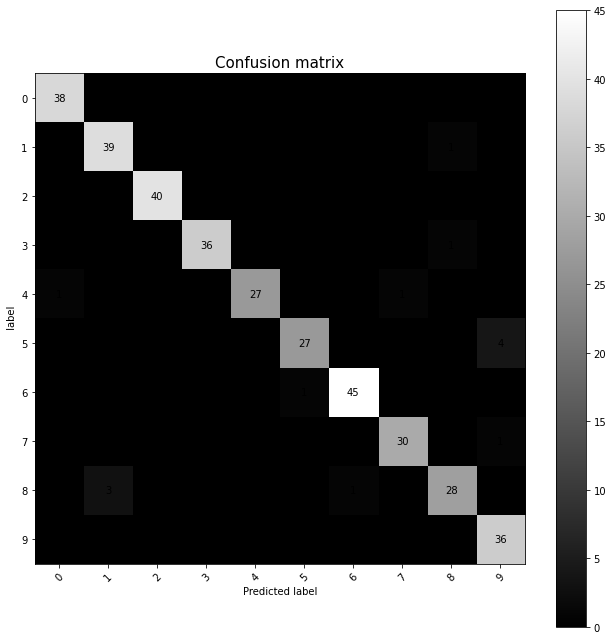

In [ ]:
confusion = metrics.confusion_matrix(Y_test, y_predtest)
print('Confusion matrix')
print(confusion)
plt.figure()
plot_confusion_matrix(confusion)
plt.show()

در اینجا باید یک عکس دست نویس در ادرسخواسته شده بارگذاری شود

In [ ]:
import cv2
request_IMG = cv2.imread('sample_data/0.jfif' ,cv2.IMREAD_GRAYSCALE)
request_IMG =request_IMG.reshape(1, -1)
print(request_IMG.shape)
pred10 = model.predict(request_IMG.reshape(1, -1))
print(pred10)

(1, 64)
[0]


تصویر از خروجی مدل
پس میبینیم که مدل به درستی عدد را تشخیص داده و صفر برگردانده.
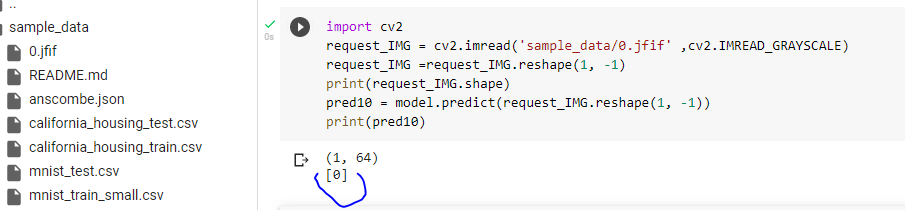